# Eletromagnetismo e Ondulatória - Projeto Final
##  Simulações numéricas essenciais para transmissão de energia sem fio (WPT)

### Integrantes 
 - Gabriel Onishi
 - João Vitor Pazotti
 - Pedro Mahfuz
 - Sarah Pimenta
 
## Objetivos 
Essa etapa do projeto visa simular computacionalmente o circuito elétrico a ser utilizado no projeto para encontrar os valores ótimos de montagem. Para tanto, dividiu-se essa parte do projeto em 5 outras:

## Parte 1 - Elaboração do diagrama do modelo eletrodinâmico do circuito WPT
O circuito a ser utilizado foi cedido pelos professores e seu diagrama eletrodinâmico está exposto na Imagem 1, abaixo.
<img src="circuito_projeto.jpg" style="padding: 20px">
<center>Imagem 1: Circuito do Projeto, montado no Ciruit Lab</center><br>
Observa-se que o circuito se assemelha muito ao modelo de transformador elétrico apresentado em aula, exceto por capacitores no primário e no secundário. Esses componentes são utilizados nos dois circuitos com o mesmo propósito: maximizar a corrente através de uma corrente ressonante.<br>
Para ilustrar esse conceito, pode-se utilizar um circuito RLC ordinário, como na Imagem 2:
<img src="circuito_RLC.jpg" style="padding: 20px">
<center>Imagem 2: Circuito RLC ordinário, montado no Ciruit Lab</center><br>
Equacionando esse circuito, temos a seguinte equação:

<center style="padding: 20px"><h2>
$ \frac{\hat{U}_f}{R+j \omega L +\frac{1}{j \omega C}} = \hat{I} $
</h2></center>

Para esse circuito, a corrente máxima acontece quando *$j\omega L = - \frac{1}{j \omega C}$*, já que dessa forma as impedâncias do capacitor e do indutor se cancelam<br>
Fazendo manipulações algébricas, fica fácil de provar que a frequência angular de ressonância é dada por:
<center style="padding: 20px"><h2>
$\omega_{res} = \frac{1}{\sqrt{LC}}$
</h2></center>

Através de manipulação algébrica, descobre-se a frequência de ressonância de um sistema RLC
<center style="padding: 20px"><h2>
$f_{res} = \frac{1}{2\pi\sqrt{LC}}$
</h2></center>

## Parte 2 - Código do Módulo Numérico

Imports dos módulos

In [1]:
from cmath import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

Variáveis do Transformador

In [2]:
# Parâmetro medidos da bobina real
R1 = 0.455
R2 = 0.455
L1 = 296.6e-6 
L2 = 296.6e-6
# Capacitor disponível no lab escolhido para análise
C1 = 1e-6
C2 = 1e-6

# Frequência de ressonância, segundo equações apresentadas anteriormente
w = 1/sqrt(L1*C1)
f = 1/(2*pi*sqrt(L1*C1))
# Parâmetro k escolhido
k = 0.1

# Cálculo das Impedâncias
XL1 = 1j*w*L1
XL2 = 1j*w*L2
XC1 =1 /(1j*w*C1)
XC2 =1 /(1j*w*C2)
M = k*sqrt(L1*L2)
XM = 1j*w*M
Uf = 5

In [3]:
def CalcularTransformador(V1, Rc):
    """
    Calcula as correntes do circuito a partir dos parâmetros no primário e no secundário
    
    Parâmetros:
     - V1: Tensão de alimentação do primário
     - Rc: Resistência da Carga
    """
    Z=np.array([[R1+XL1+XC1, -XM],[-XM, XL2+R2+((Rc*XC2)/(Rc+XC2))]])
    V=np.array([V1,0])
    I=np.dot(linalg.inv(Z),V)
    return I[0], I[1]

In [4]:
def S(V:complex, I:complex):
    """
    Calcula a potência total S do componente/sistema

    Parâmetros:
     - V: Tensão que passa no componente/sistema
     - I: Corrente que passa no componente/sistema
     - Z: Impedância local
    """

    Vpico = abs(V)
    Ipico = abs(I)
    Veficaz = Vpico/sqrt(2)
    Ieficaz = I/sqrt(2)
    Ief_conj = Ieficaz.conjugate()

    S = Veficaz*Ief_conj

    return S

In [5]:
# Tensão de alimentação a partir do PWM
Uf = 2/pi*20
Rc = 10

#A função calcula as duas correntes
i1, i2 = CalcularTransformador(Uf, Rc)

#Com as correntes, é possível calcular o V2 
V2 = ((XC2*Rc)/(XC2+Rc)) * i2

#Potência 
S2=S(V2,i2)

print("Corrente no primario (i1)          --> {0:.5f} A".format(abs(i1)))
print("Corrente no secundário (i2)        --> {0:.5f} A".format(abs(i2)))
print("Tensão no secundário (V2)          --> {0:.5f} V".format(abs(V2)))
print("Potência eficaz (S2ef)             --> {0:.5f} W".format(S2.real))
print("Frequência de ressonância (f)      --> {0:.5f} Hz".format(f.real))

Corrente no primario (i1)          --> 21.86652 A
Corrente no secundário (i2)        --> 2.48950 A
Tensão no secundário (V2)          --> 21.52886 V
Potência eficaz (S2ef)             --> 17.82930 W
Frequência de ressonância (f)      --> 9241.33169 Hz


Nessa simulação, percebemos que a frequência de ressonância, que maximiza a potência nos dois lados do transformador, gira em torno de $9,2kH$

## Parte 3: Construção de gráficos de I1 e I2 em função da frequência:

Para essa sub-etapa, busca-se plotar os módulos das correntes no primário e no secundário (I1 e I2) para um valor de coeficiente de acoplamento inicialmente fixo (nesse caso, utilizou-se $k = 0.1$) e, em seguida, variá-lo. Essa etapa busca responder a duas perguntas:
1) A frequência para a qual as correntes são máximas é coincidente com a frequência de ressonância que vocês obtiveram na atividade 1? <br>
2) O que acontece com os gráficos dos módulos das correntes quandose altera o 𝑘 do circuito? 

### Para um valor de k fixo

In [13]:
# Função utilizada para modelar as correntes I1 e I2 com f variante
def ListaI1I2(lista_f,k):
    I1=[]
    I2=[]
    for f in lista_f:
        M = k*sqrt(L1*L2)
        w = 2*pi*f
        XL1 = 1j * w * L1
        XL2 = 1j * w * L2
        XM = 1j * w * M
        XC1 = 1/(1j*w*C1)
        XC2 = 1/(1j*w*C2)

        Z=np.array([[R1+XL1+XC1, -XM],[-XM, XL2+R2+(Rc*XC2)/(Rc+XC2)]])
        V=np.array([Uf,0])
        I=np.dot(linalg.inv(Z),V)
       
        I1.append(abs(I[0]))
        I2.append(abs(I[1]))

    return I1,I2

(0.0, 20000.0)

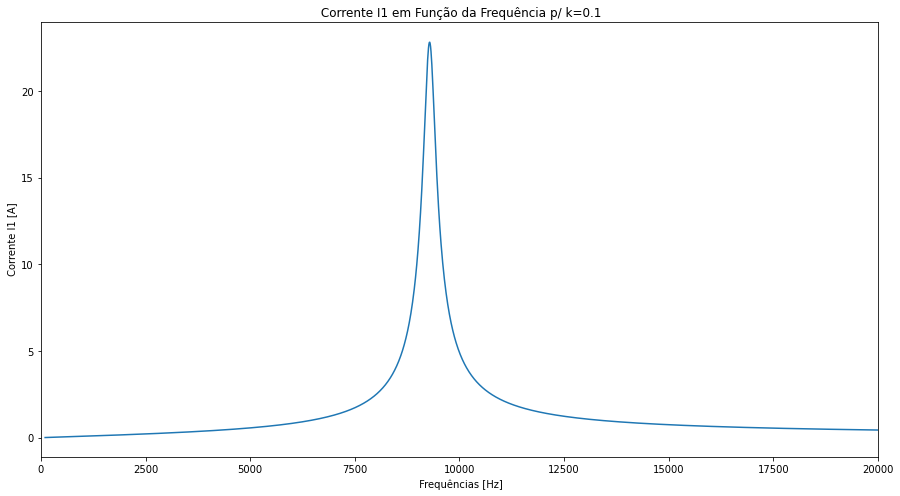

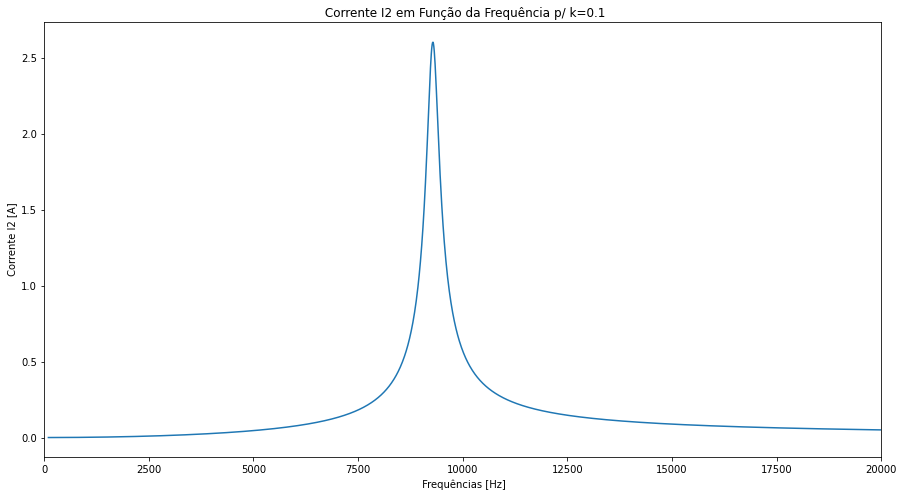

In [19]:
lista_f = np.arange(100,60e3,10)
k = 0.1

plt.figure(figsize=(15,8))
I1, I2 = ListaI1I2(lista_f,k)
plt.plot(lista_f,I1,label="k = {0:.1f}".format(k))
plt.title(" Corrente I1 em Função da Frequência p/ k=0.1")
plt.xlabel(" Frequências [Hz]")
plt.ylabel(" Corrente I1 [A]")
plt.xlim([0,20000])

plt.figure(figsize=(15,8))
I1, I2 = ListaI1I2(lista_f,k)
plt.plot(lista_f,I2,label="k = {0:.1f}".format(k))
plt.title(" Corrente I2 em Função da Frequência p/ k=0.1")
plt.xlabel(" Frequências [Hz]")
plt.ylabel(" Corrente I2 [A]")
plt.xlim([0,20000])


In [30]:
# Achando a frequência I1 e I2
print(f'A frequência máxima atingida é {max(I1)} para I1 e {max(I2)} para I2, encontrados sob uma frequência de {lista_f[I2.index(max(I2))]}Hz')

A frequência máxima atingida é 22.817229024812335 para I1 e 2.6015587127691764 para I2, encontrados sob uma frequência de 9290.0Hz


O gráfico acima nos permite concluir que, para um $k=0.1$, o valor de frequência que maximiza as correntes coincide com o valor teórico da frequência de ressonância ($9290Hz$ e $9241.33169Hz$, respectivamente)

### Para valores de k variáveis

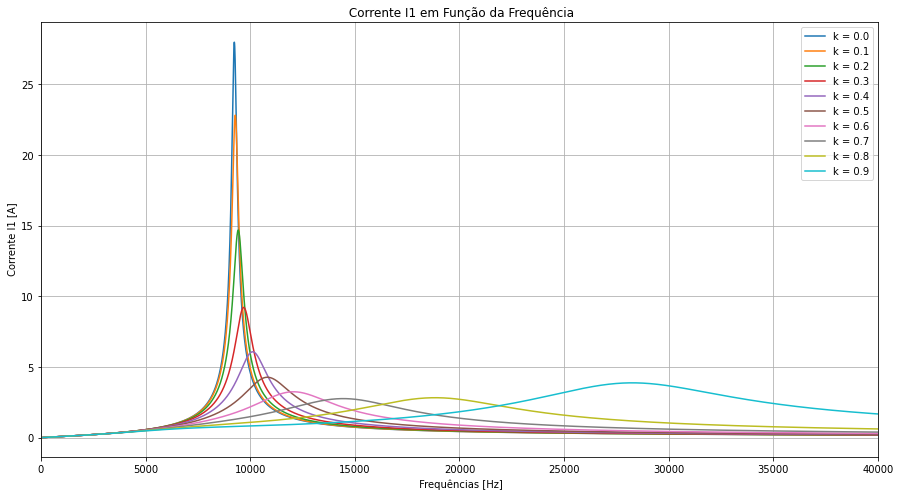

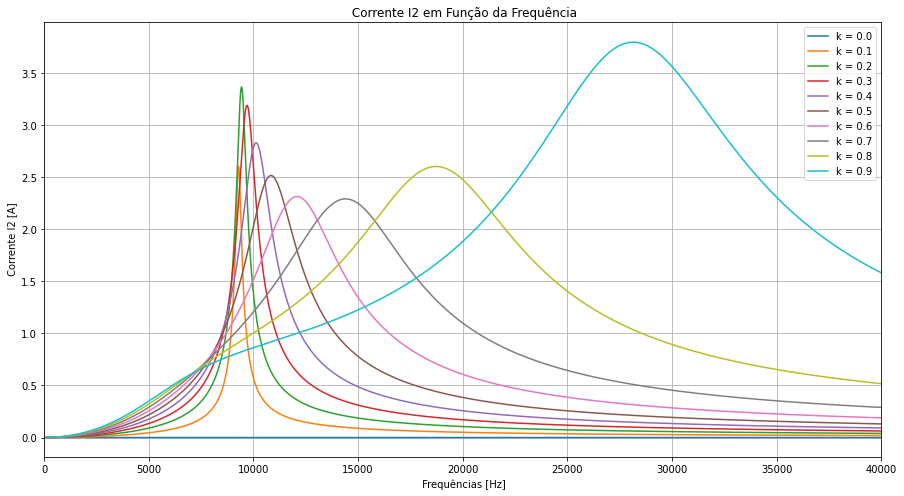

In [32]:
lista_k = np.arange(0,1,0.1)
picosI1=[]

plt.figure(figsize=(15,8))
for k in lista_k:
    I1, I2 = ListaI1I2(lista_f,k)
    maximo=max(I1)
    picosI1.append(maximo)
    plt.plot(lista_f,I1,label="k = {0:.1f}".format(k))
    plt.title(" Corrente I1 em Função da Frequência")
    plt.xlabel(" Frequências [Hz]")
    plt.ylabel(" Corrente I1 [A]")
    plt.legend()

plt.xlim([0, 40000])
plt.grid()
plt.show() 
picosI2=[]

plt.figure(figsize=(15,8))
for k in lista_k:
    I1, I2 = ListaI1I2(lista_f,k)
    maximo=max(I2)
    picosI2.append(maximo)
    plt.plot(lista_f,I2,label="k = {0:.1f}".format(k))
    plt.title(" Corrente I2 em Função da Frequência")
    plt.xlabel(" Frequências [Hz]")
    plt.ylabel(" Corrente I2 [A]")
    plt.legend()
    
plt.xlim([0, 40000])
plt.grid()
plt.show() 

Observa-se que para valores de $k$ pequenos, em torno de 0.1, o valor da corrente é máximo quando a frequência é em torno de $9.000Hz$, coincidindo com a frequência de ressonância calculada. Contudo, conforme o coeficiente de acoplamento (k) cresce, também cresce o valor da frequência que maximiza a corrente.

Gráfico de Picos da Corrente Î1

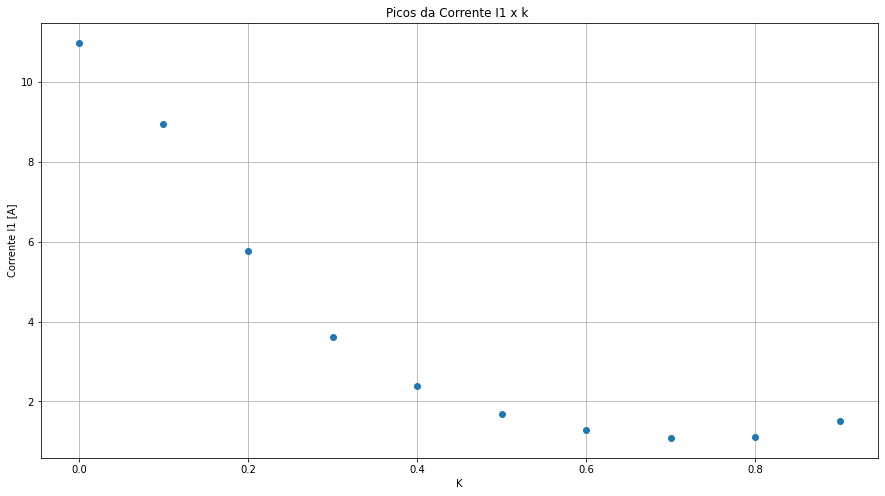

In [25]:
plt.figure(figsize=(15,8))
plt.plot(lista_k,picosI1,"o")
plt.title("Picos da Corrente I1 x k ")
plt.xlabel("K")
plt.ylabel("Corrente I1 [A]")
plt.grid()
plt.show()

Gráfico de Picos da Corrente Î2

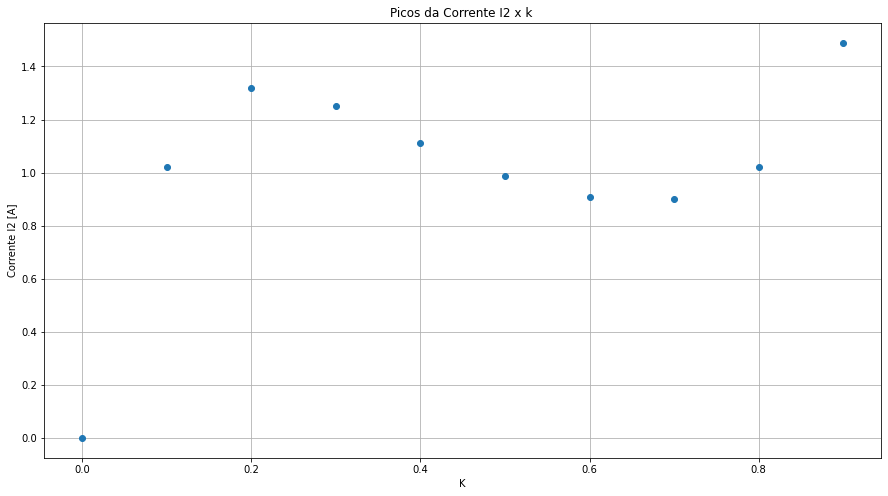

In [26]:
plt.figure(figsize=(15,8))
plt.plot(lista_k,picosI2,"o")
plt.title("Picos da Corrente I2 x k ")
plt.xlabel("K")
plt.ylabel("Corrente I2 [A]")
plt.grid()
plt.show()

## Parte 4: Construção de gráficos das potências e da eficiência em função da frequência

Essa parte tem por objetivo a construção de 3 gráficos:
 - Gráfico 1: Potência real de entrada em função da frequência da fonte <br>
 - Gráfico 2: Potência real de saída em função da frequência da fonte <br>
 - Gráfico 3: Eficiência em função da frequência da fonte

### 1: Gráfico da Potencia S1 em Funcão da Frequência

In [33]:
def ListaI1I2S1S2(lista_f,lista_k):
    I1=[]
    I2=[]
    S1=[]
    S2=[]
    for f in lista_f:
        M = lista_k*sqrt(L1*L2)
        w = 2*pi*f
        XL1 = 1j * w * L1
        XL2 = 1j * w * L2
        XM = 1j * w * M
        XC1 = 1/(1j*w*C1)
        XC2 = 1/(1j*w*C2)

        Z=np.array([[R1+XL1+XC1, -XM],[-XM, XL2+R2+(Rc*XC2)/(Rc+XC2)]])
        V=np.array([Uf,0])
        I=np.dot(linalg.inv(Z),V)
        
        i1,i2=I[0],I[1]
        
        Zeq=(Rc*XC2)/(Rc+XC2)
        
        V2 = i2 * Zeq
        
        IRc = V2/Rc
        
        S1ef = (Uf * i1.conjugate())/2
        S2ef = (V2 * IRc.conjugate())/2

       
        I1.append(abs(i1))
        I2.append(abs(i2))
        S1.append(S1ef.real)
        S2.append(S2ef.real)
        

    return I1,I2,S1,S2



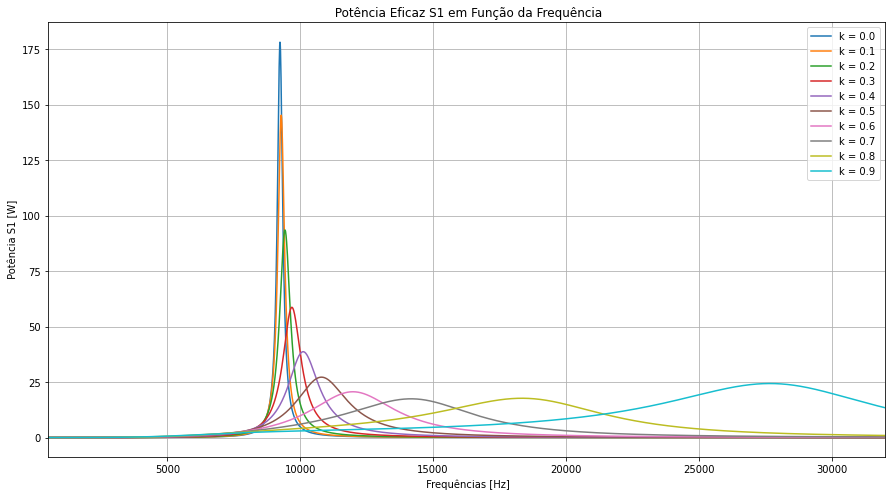

In [34]:
plt.figure(figsize=(15,8))
picosS1=[]
for k in lista_k:
    I1, I2, S1ef, S2ef = ListaI1I2S1S2(lista_f,k)
    maximo=max(S1ef)
    picosS1.append(maximo)
    plt.plot(lista_f,S1ef,label="k = {0:.1f}".format(k))
    plt.title(" Potência Eficaz S1 em Função da Frequência")
    plt.xlabel(" Frequências [Hz]")
    plt.ylabel(" Potência S1 [W]")
    plt.legend()

ax=plt.gca()
ax.set_xlim([500, 32000])
plt.grid()
plt.show() 

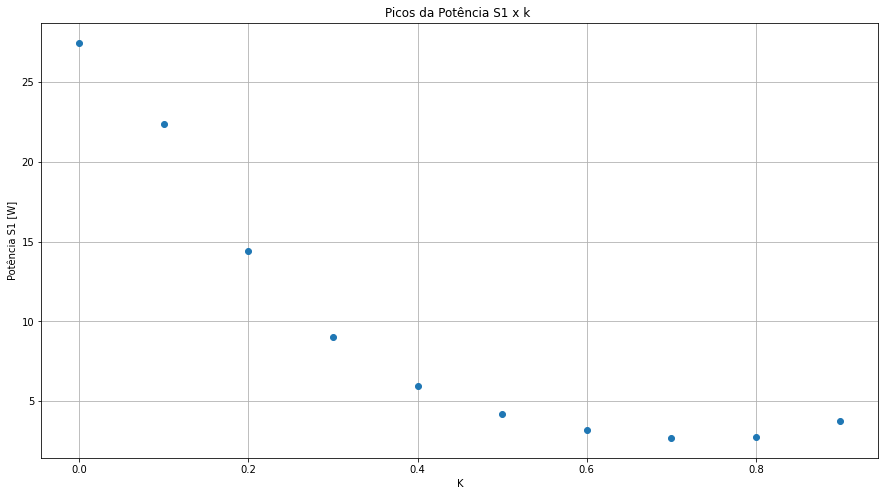

In [29]:
plt.figure(figsize=(15,8))
plt.plot(lista_k,picosS1,"o")
plt.title("Picos da Potência S1 x k ")
plt.xlabel("K")
plt.ylabel("Potência S1 [W]")
plt.grid()
plt.show()

### 2: Gráfico da Potencia S2 em Funcão da Frequência

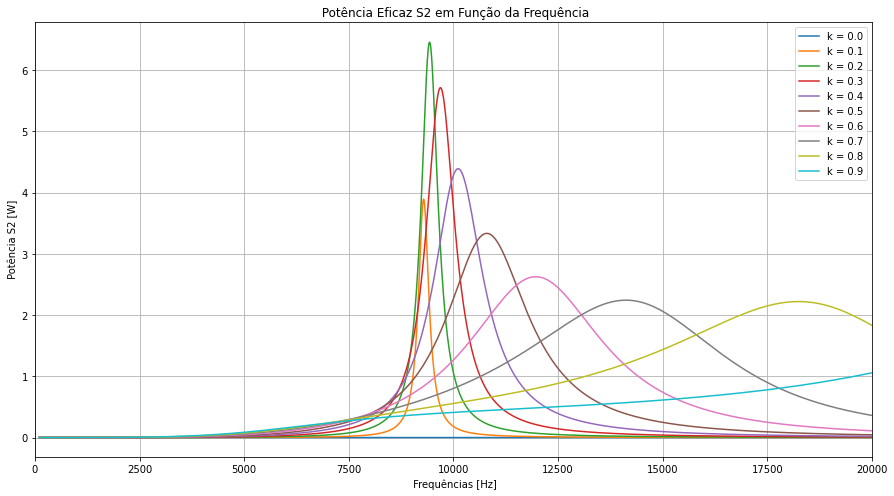

In [30]:
plt.figure(figsize=(15,8))
picosS2=[]
for k in lista_k:
    I1, I2, S1ef, S2ef = ListaI1I2S1S2(lista_f,k)
    maximo=max(S2ef)
    picosS2.append(maximo)
    plt.plot(lista_f,S2ef,label="k = {0:.1f}".format(k))
    plt.title(" Potência Eficaz S2 em Função da Frequência")
    plt.xlabel(" Frequências [Hz]")
    plt.ylabel(" Potência S2 [W]")
    plt.legend()

ax=plt.gca()
ax.set_xlim([0, 2e4])
plt.grid()
plt.show() 

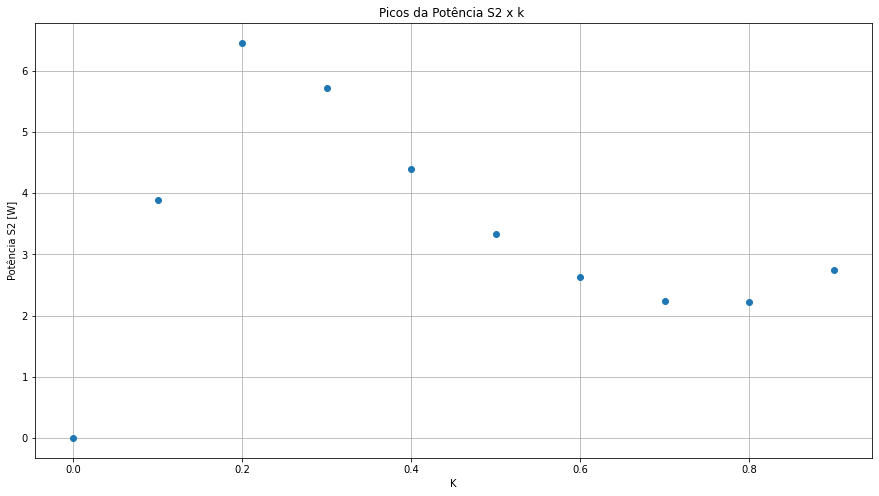

In [31]:
plt.figure(figsize=(15,8))
plt.plot(lista_k,picosS2,"o")
plt.title("Picos da Potência S2 x k ")
plt.xlabel("K")
plt.ylabel("Potência S2 [W]")
plt.grid()
plt.show()

Gráfico de V2 por valores de K

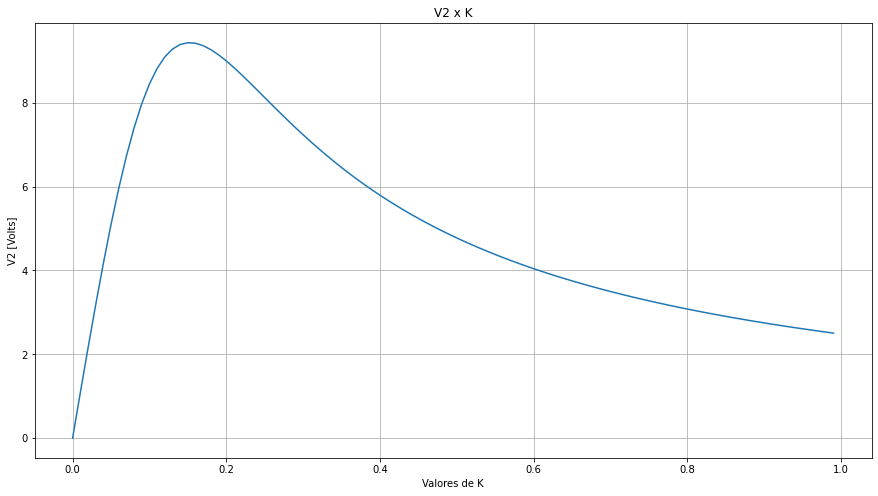

In [32]:
espacos = np.arange(0,1, 0.01)
V2 = []
plt.figure(figsize=(15,8))
for k in espacos:
    M = k*sqrt(L1*L2)
    XM = 1j * w * M
    
    i1, i2 = CalcularTransformador(Uf, Rc)
    zeq=(XC2*Rc)/(XC2+Rc)
    v2 = zeq * i2
    V2.append(abs(v2))
    
plt.plot(espacos,V2)
plt.title("V2 x K")
plt.xlabel("Valores de K")
plt.ylabel("V2 [Volts]")
plt.grid()
plt.show()

Gráfico de Eficiencia

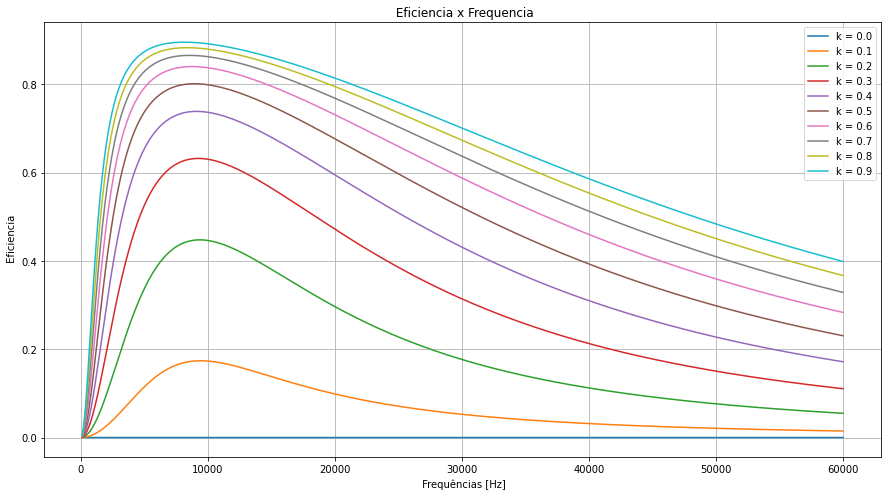

In [33]:
plt.figure(figsize=(15,8))

for k in lista_k:
    I1, I2, S1ef, S2ef = ListaI1I2S1S2(lista_f,k)
    rendimento=[]
    for i in range(len(S2ef)):
        n = S2ef[i]/S1ef[i]
        rendimento.append(n)
    plt.plot(lista_f,rendimento,label="k = {0:.1f}".format(k))
    plt.title(" Eficiencia x Frequencia")
    plt.xlabel(" Frequências [Hz]")
    plt.ylabel(" Eficiencia")
    plt.legend()

plt.grid()
plt.show() 

Esse último gráfico comprova que